In [8]:
import pandas as pd

train = pd.read_csv('train-data.csv')

train.info() #.info() 함수는 데이터에 대한 전반적인 정보를 나타냅니다.
#df를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력해줍니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#### 데이터 분석
14개의 항목,  6019개의 데이터, 엔진 마력, 신차가격, 좌석 수에 결측치가 있다.  

 8   Mileage            6017 non-null   object  
연비 Mileage 은 2개만 빠졌다.  

 9   Engine             5983 non-null   object   
 
 10  Power              5983 non-null   object   
 
 11  Seats              5977 non-null   float64  
 
 12  New_Price          824 non-null    object  
신차 가격은 결측치가 많다.  

 13  Price              6019 non-null   float64  
 

Name의 특성부터 처리
Name은 회사명만 남기고 뒤의 글자는 삭제한다.

# Owner_Type 전처리 & csv 파일에서 인덱스 삭제

In [9]:
train['Owner_Type'] = train['Owner_Type'].replace('First', 1)
train['Owner_Type'] = train['Owner_Type'].replace('Second', 2)
train['Owner_Type'] = train['Owner_Type'].replace('Third', 3)
train['Owner_Type'] = train['Owner_Type'].replace('Fourth & Above', 4)
train = train.drop('Unnamed: 0', axis=1)
train
#replace를 하려면, replace를 쓰고나서 다시 옮겨줘야한다. 그렇지 않으면 저장이 안되는듯.
#데이터 자체에 인덱스가 있어서 해당 열을 지워야했다.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# Name 전처리

In [10]:
train['Name'].str.extract('([A-Za-z]+).')
#[A-Za-z]는 문자를 대소문자 관계없이 하나를 추출, +가 붙어서 단어 단위로 추출한다.
train['Name'] = train['Name'].str.extract('([A-Za-z]+).')

# Mileage 전처리

In [11]:
train[train['Mileage'].isnull() == True]
#train데이터에는 Mileage에 결측값이 있다.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra,Chennai,2016,50000,Electric,Automatic,1,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota,Mumbai,2011,44000,Electric,Automatic,1,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [12]:
train[train['Fuel_Type'] == "Electric"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra,Chennai,2016,50000,Electric,Automatic,1,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota,Mumbai,2011,44000,Electric,Automatic,1,NaN,1798 CC,73 bhp,5.0,NaN,12.75


#### Madindra E verito D4 만이, 전기차이다.
따라서 연비가 리터당이 아니라 완충시 거리로 나오기 때문에 연비가 결측치로 나타난 것이다.  

이런 경우, 데이터가 한 개뿐이라서 전체 모델에 미치는 영향은 아주 미미할 것으로 생각했다.
따라서 마힌드라 차량의 데이터는 지우기로 결정했다.  

반면, 도요타 프리우스 2011년식은 29.3으로 연비가 존재한다.
따라서 이 경우에는 연비를 새로 입력해줬다.

In [13]:
train.loc[4904,'Mileage'] = 29.3
#직접 찾은 도요타 프리우스의 연비를 입력해준다.
train['Mileage'].dropna()
#Mileage에 결측치 NaN값이 있는 데이터는 삭제한다.

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6018, dtype: object

In [14]:
train[train['Mileage'] == '0.0 kmpl']
#아래 출력에서 보듯이, 연비가 0.0kmpl인 차량들이 있다.
#이러한 이상치들은 우선 연비의 중앙값으로 채운 뒤, 나중에 모델의 성능이 떨어지면
#그때 더 세세한 전처리를 해보도록 할 것이다.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land,Pune,2012,85000,Diesel,Automatic,2,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50
67,Mercedes,Coimbatore,2019,15369,Diesel,Automatic,1,0.0 kmpl,1950 CC,194 bhp,5.0,49.14 Lakh,35.67
79,Hyundai,Hyderabad,2005,87591,Petrol,Manual,1,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,1,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
229,Ford,Bangalore,2015,70436,Diesel,Manual,1,0.0 kmpl,1498 CC,99 bhp,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota,Mumbai,2001,227000,Diesel,Manual,4,0.0 kmpl,2446 CC,null bhp,8.0,NaN,2.20
5875,Mercedes,Ahmedabad,2019,4000,Diesel,Automatic,1,0.0 kmpl,1950 CC,194 bhp,5.0,49.14 Lakh,35.00
5943,Mahindra,Chennai,2002,75000,Diesel,Manual,1,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70
5972,Hyundai,Mumbai,2008,65000,Petrol,Manual,2,0.0 kmpl,1086 CC,62 bhp,5.0,NaN,1.39


#### 오차 발생 가능성
#아래 출력에서 보듯이, 연비가 0.0kmpl인 차량들이 있다.  
#이러한 이상치들은 우선 연비의 중앙값으로 채운 뒤, 나중에 모델의 성능이 떨어지면  
#그때 더 세세한 전처리를 해보도록 할 것이다.  

In [15]:
import numpy as np
train['Mileage'] = train["Mileage"].str.extract('([0-9]+\.[0-9]+)')
train['Mileage'] = train['Mileage'].astype(float)
train['Mileage'] = train['Mileage'].replace(0, train['Mileage'].median())

#연비 항목이 '0.0kmpl' 이었던 값들을, 우선 float형으로 바꿔주고,
#연비의 중앙값을 대입했다. (이 과정에서 정확도가 떨어질 것 같다.

# Engine 전처리

In [16]:
train[train['Engine'].isnull() == True]
#아래 출력에서 보듯이, Engine에 결측값들이 있다.
#또한 이 데이터는 특이하게, Engine 특성에 결측값이 있는 데이터들은 모두 Power특성도 결측되어있다.
#이러한 이상치들은 우선 Engine의 중앙값으로 채운 뒤, 나중에 모델의 성능이 떨어지면
#그때 더 세세한 전처리를 해보도록 할 것이다.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,1,18.15,NaN,NaN,NaN,NaN,2.95
208,Maruti,Kolkata,2010,42001,Petrol,Manual,1,16.10,NaN,NaN,NaN,NaN,2.11
733,Maruti,Chennai,2006,97800,Petrol,Manual,3,16.10,NaN,NaN,NaN,NaN,1.75
749,Land,Mumbai,2008,55001,Diesel,Automatic,2,18.15,NaN,NaN,NaN,NaN,26.50
1294,Honda,Delhi,2009,55005,Petrol,Manual,1,12.80,NaN,NaN,NaN,NaN,3.20
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,1,16.10,NaN,NaN,NaN,NaN,5.80
1385,Honda,Pune,2004,115000,Petrol,Manual,2,18.15,NaN,NaN,NaN,NaN,1.50
1460,Land,Coimbatore,2008,69078,Petrol,Manual,1,18.15,NaN,NaN,NaN,NaN,40.88
2074,Maruti,Pune,2011,24255,Petrol,Manual,1,16.10,NaN,NaN,NaN,NaN,3.15
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,1,18.15,NaN,NaN,NaN,NaN,1.93


In [17]:
train['Power'] = train["Power"].str.extract('([0-9]+\.[0-9]+)')
train['Power'] = train['Power'].astype(float)

train['Engine'] = train['Engine'].str.extract('([0-9]+)')
train['Engine'] = train['Engine'].astype(float)

#Power와 Engine 모두 숫자데이터만 남기고 float형식으로 바꾼다.

In [18]:
train_num = train.drop(['Name', 'Location', 'Fuel_Type','Transmission','New_Price'], axis = 1)

#문자로 된 데이터들도 분명히 중고가 책정에 이유가 되겠지만,
#제대로 다루기에는, 도메인 지식이 필요해서 문자로 된 데이터들의 열은 모두 지운다.
# .drop()함수를 사용한다. axis = 1은 열을 지운다는 뜻이다.

# Year, Kilometers_Driven

In [19]:
train['Kilometers_Driven'] = train['Kilometers_Driven'].astype(float)

In [20]:
from sklearn.impute import SimpleImputer

transformer = SimpleImputer()
transformer.fit(train_num)
X = transformer.transform(train_num)
#SimpleImputer의 transform을 이용해서, 결측치를 채운다.

train_num = pd.DataFrame(X, columns = train_num.columns, index = train_num.index)

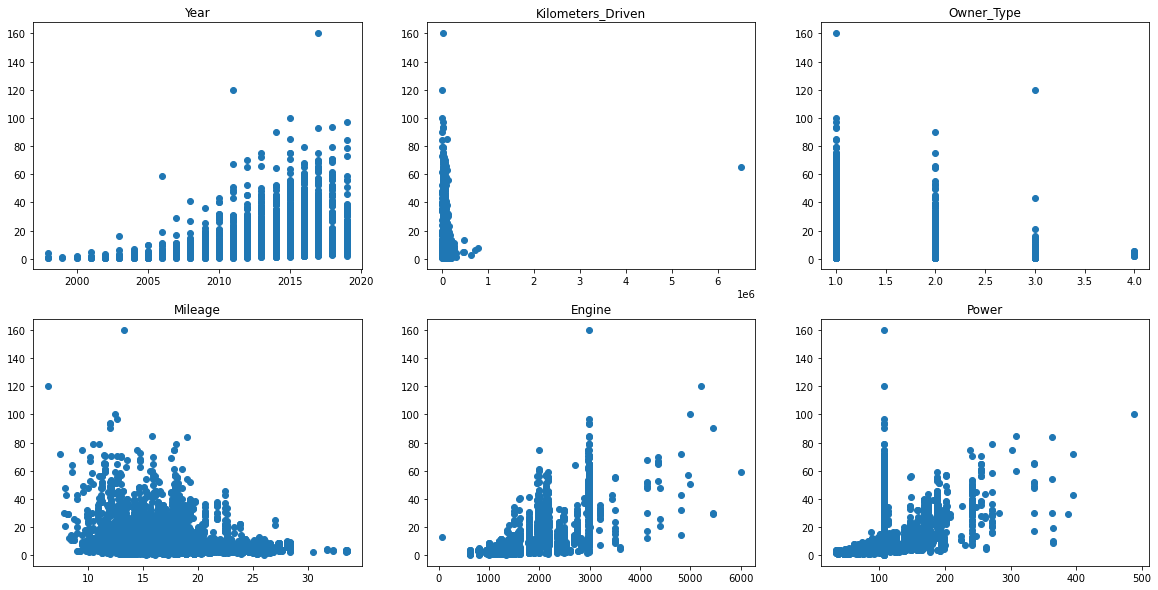

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.scatter(train_num.iloc[:,i], train_num['Price'])
    plt.title(train_num.columns[i])
#train 데이터의 숫자형데이터들을 matplotlib으로 시각화

In [22]:
train_num[train_num['Kilometers_Driven']>6000000]
#인덱스 2328의 'Kilometers_Driven' 값이 잘못 입력된 것 같다,
#데이터가 하나 밖에 없으므로, 데이터를 제거해도 될 것 같아서 제거했다.
train_num.drop(2328, inplace= True)

In [23]:
train_num[train_num['Kilometers_Driven']>6000000]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price


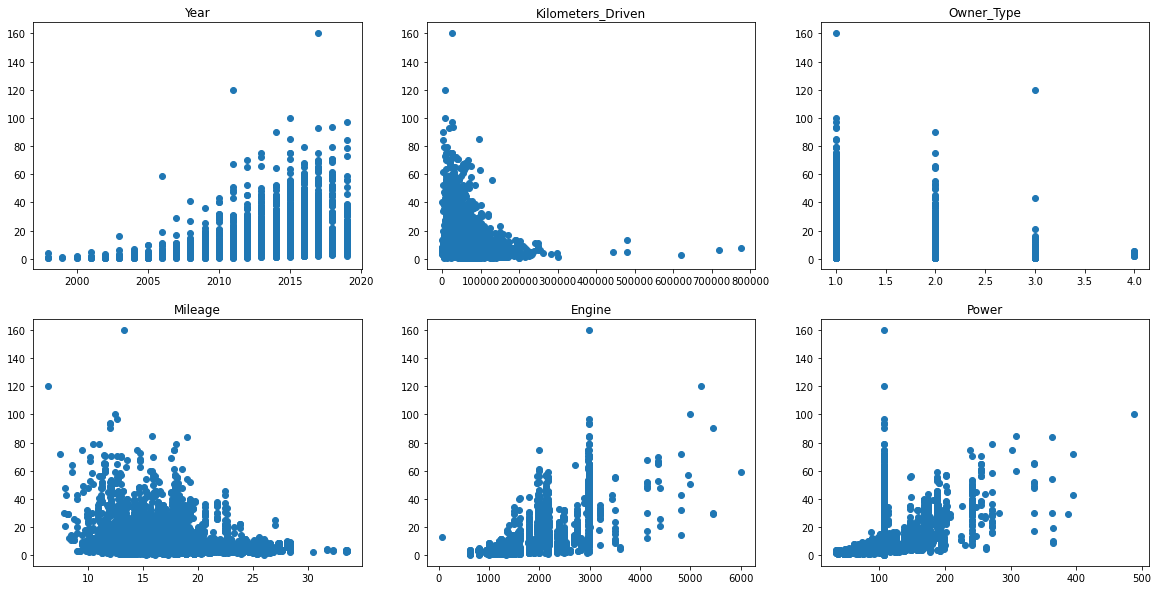

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.scatter(train_num.iloc[:,i], train_num['Price'])
    plt.title(train_num.columns[i])
#train 데이터의 숫자형데이터들을 matplotlib으로 시각화
#다시 그려보면 제대로 나온다,

# 범주형 데이터의 처리

In [25]:
train_cat = train.drop(['Year', 'Kilometers_Driven','Owner_Type','Mileage', 'Engine', 'Power','Seats','New_Price','Price'], axis = 1)
#train_num = train.drop(['Name', 'Location', 'Fuel_Type','Transmission','New_Price'], axis = 1)
train_cat.drop(2328, inplace= True)

#범주형 데이터들을 처리하기 위해, train_cat을 선언한다.
#train_cat에도 train_num에서와 같은 전처리를 해주기 위해 2328을 삭제한다.
#train에서 이미 웬만한 전처리를 모두 마쳤기 때문에 2328만 해주면 된다.
train_cat

,Name,Location,Fuel_Type,Transmission
0,Maruti,Mumbai,CNG,Manual
1,Hyundai,Pune,Diesel,Manual
2,Honda,Chennai,Petrol,Manual
3,Maruti,Chennai,Diesel,Manual
4,Audi,Coimbatore,Diesel,Automatic
...,...,...,...,...
6014,Maruti,Delhi,Diesel,Manual
6015,Hyundai,Jaipur,Diesel,Manual
6016,Mahindra,Jaipur,Diesel,Manual
6017,Maruti,Kolkata,Petrol,Manual


In [26]:
train_cat = train_cat.astype(str)

#전처리 전에, 범주형 데이터들을 모두 str타입으로 변환해준다.
#그 후, 범주형 데이터의 열들을 따로 떼어내서 각각의 데이터프레임 객체로 저장한 뒤,
#get_dummies 메서드를 이용해서 범주형 데이터들을 더미변수화 한다.
train_cat

,Name,Location,Fuel_Type,Transmission
0,Maruti,Mumbai,CNG,Manual
1,Hyundai,Pune,Diesel,Manual
2,Honda,Chennai,Petrol,Manual
3,Maruti,Chennai,Diesel,Manual
4,Audi,Coimbatore,Diesel,Automatic
...,...,...,...,...
6014,Maruti,Delhi,Diesel,Manual
6015,Hyundai,Jaipur,Diesel,Manual
6016,Mahindra,Jaipur,Diesel,Manual
6017,Maruti,Kolkata,Petrol,Manual


In [27]:
name = pd.DataFrame(train_cat.iloc[:,0])
loc= pd.DataFrame(train_cat.iloc[:,1])
fuel = pd.DataFrame(train_cat.iloc[:,2])
trans = pd.DataFrame(train_cat.iloc[:,3])
#.iloc[]으로 접근해서, 인덱스로 접근할 수 있게 한다.
#name 리스트에 값들을 저장해준다.

name = pd.get_dummies(name, drop_first= True)
loc = pd.get_dummies(loc, drop_first= True)
fuel = pd.get_dummies(fuel, drop_first= True)
trans = pd.get_dummies(trans, drop_first= True)
#리스트의 첫번째 열은 사용하지 않고, 더미변수화한다.

train_cat = pd.concat([name,loc,fuel,trans], axis = 1)
train_num = train_num.astype(float)
#name, loc, fuel 등을 train_cat에 합쳐주고
#train_num은 float형으로 통일해준다.
train_cat

,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6015,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
6016,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_num)
train_scaled = scaler.transform(train_num)

train_scaled = pd.DataFrame(train_scaled)
train_scaled.rename(columns = {0:'Year',1:'Kilometers_Driven',2:'Owner_Type',3:'Mileage',4:'Engine',5:'Power',6:'Seats',7:'Price'}, inplace = True)
#이제 숫자형 데이터들을 표준화해서 스케일을 맞춰준다.
#표준화한 값들을 train_scaled에 저장해준다.

train_prepared = pd.concat([train_scaled, train_cat], axis = 1)

train_labels = train_scaled['Price']

train_scaled.drop('Price', inplace= True, axis =1)
#표준화한 train_scaled와 train_cat을 pd.concat를 이용해서 train_prepared에 저장하고
#타겟값인 Price는 train_labels에 따로 떼어서 저장하고
#train_prepared에 타겟값을 지운다.

#이로써, train의 전처리를 모두 마쳤다.
train_prepared.drop(6018, inplace= True)
train_prepared

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,-1.026974,0.378395,-0.444598,1.989740,-1.039639,-1.322781,-0.345881,-0.691468,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.502356,-0.440073,-0.444598,0.320286,-0.065158,0.533671,-0.345881,0.271362,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.721108,-0.308062,-0.444598,-0.033840,-0.704244,-0.489506,-0.345881,-0.445163,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.415242,0.774428,-0.444598,0.585279,-0.622481,-0.487868,2.135496,-0.310814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.109376,-0.448786,1.746712,-0.756548,0.578935,0.932028,-0.345881,0.740686,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0.196490,-0.800067,-0.444598,2.423365,-0.622481,0.000000,-0.345881,-0.422771,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6014,0.502356,1.117657,-0.444598,1.459755,-0.836066,0.000000,-0.345881,-0.489946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6015,-0.415242,-0.070442,1.746712,-1.045631,1.463310,0.000000,3.376184,-0.588468,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6016,-0.109376,-0.308062,-0.444598,0.134791,-1.039639,-1.078855,-0.345881,-0.610859,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


from sklearn.linear_model import LinearRegression

linear = LinearRegression()

X_train = train_prepared
y_train = train_labels

linear.fit(X_train,y_train)

linear.score(X_train, y_train)

In [29]:
train_prepared[train_prepared['Location_Kolkata'].isnull() == True]
#2328이 문제가 되서 train_prepared와 train_lables 각각에서 2328을 삭제한다.

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
2328,0.502356,0.140775,-0.444598,0.43351,-0.205323,-0.486777,-0.345881,-0.390528,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
i = 0
if(i != 1):
    train_prepared.drop(2328, inplace = True)
    train_labels.drop(2328,inplace = True)
    i+=1

In [31]:
train_prepared

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,-1.026974,0.378395,-0.444598,1.989740,-1.039639,-1.322781,-0.345881,-0.691468,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.502356,-0.440073,-0.444598,0.320286,-0.065158,0.533671,-0.345881,0.271362,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.721108,-0.308062,-0.444598,-0.033840,-0.704244,-0.489506,-0.345881,-0.445163,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.415242,0.774428,-0.444598,0.585279,-0.622481,-0.487868,2.135496,-0.310814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.109376,-0.448786,1.746712,-0.756548,0.578935,0.932028,-0.345881,0.740686,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0.196490,-0.800067,-0.444598,2.423365,-0.622481,0.000000,-0.345881,-0.422771,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6014,0.502356,1.117657,-0.444598,1.459755,-0.836066,0.000000,-0.345881,-0.489946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6015,-0.415242,-0.070442,1.746712,-1.045631,1.463310,0.000000,3.376184,-0.588468,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6016,-0.109376,-0.308062,-0.444598,0.134791,-1.039639,-1.078855,-0.345881,-0.610859,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
train_labels = pd.DataFrame(train_labels)
train_labels

,Price
0,-0.691468
1,0.271362
2,-0.445163
3,-0.310814
4,0.740686
...,...
6013,-0.422771
6014,-0.489946
6015,-0.588468
6016,-0.610859


In [33]:
data = train_prepared
target = train_labels
data

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,-1.026974,0.378395,-0.444598,1.989740,-1.039639,-1.322781,-0.345881,-0.691468,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.502356,-0.440073,-0.444598,0.320286,-0.065158,0.533671,-0.345881,0.271362,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.721108,-0.308062,-0.444598,-0.033840,-0.704244,-0.489506,-0.345881,-0.445163,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.415242,0.774428,-0.444598,0.585279,-0.622481,-0.487868,2.135496,-0.310814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.109376,-0.448786,1.746712,-0.756548,0.578935,0.932028,-0.345881,0.740686,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0.196490,-0.800067,-0.444598,2.423365,-0.622481,0.000000,-0.345881,-0.422771,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6014,0.502356,1.117657,-0.444598,1.459755,-0.836066,0.000000,-0.345881,-0.489946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6015,-0.415242,-0.070442,1.746712,-1.045631,1.463310,0.000000,3.376184,-0.588468,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6016,-0.109376,-0.308062,-0.444598,0.134791,-1.039639,-1.078855,-0.345881,-0.610859,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)
#훈련 세트(train_input,train_target)와 테스트 세트(test_input, test_target)로 나눈다.
#train_test_split함수의 여러 옵션 값들을 잘 확인해서 사용한다.

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target,  test_size = 0.2, shuffle = True, random_state = 34)
#훈련 세트를 다시 훈련세트(sub_input, sub_target)과 검증세트(val_input, val_target)로 나눠서 교차 검증을 한다.

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(sub_input, sub_target)
print(knr.score(sub_input, sub_target))

0.9658296227422082


In [36]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(val_input, val_target)
print(knr.score(val_input, val_target))

0.9670111345521887


In [37]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(sub_input, sub_target)

linear.score(sub_input, sub_target)

1.0

In [38]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(val_input, val_target)

linear.score(val_input, val_target)

1.0

In [39]:
sub_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 662 to 2480
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3850 non-null   float64
dtypes: float64(1)
memory usage: 60.2 KB


In [40]:
sub_input = sub_input.astype(int)
sub_target = sub_target.astype(int)

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 34)

dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.8304148531676387


In [42]:
train_input

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
3708,-0.721108,0.366672,-0.444598,-0.322923,-0.206991,0.000000,-0.345881,-0.355597,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5522,-1.944572,3.731474,1.746712,-1.334714,1.456636,0.000000,2.135496,-0.382467,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
604,0.808222,-0.862508,-0.444598,0.761138,-0.205323,0.050732,-0.345881,-0.001813,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1177,-0.109376,-0.301990,-0.444598,0.354013,-0.892800,-1.052935,-0.345881,-0.570555,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5826,1.419954,-0.730497,-0.444598,1.011676,-0.375523,-0.488687,-0.345881,-0.154075,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,-1.026974,1.513689,1.746712,-0.101293,-0.892800,-1.215279,-0.345881,-0.713860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5994,0.502356,-0.730497,-0.444598,0.368467,-0.267062,-0.623201,-0.345881,-0.154075,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2539,1.114088,-1.205737,-0.444598,0.664777,-1.346668,-1.403543,-0.345881,-0.534728,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5243,0.196490,-0.422093,-0.444598,-0.322923,-0.707581,0.000000,-0.345881,-0.440685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [43]:
dt_f_i = (dt.feature_importances_)
dt_f_i[0:8] #Year~New_price
print("특성 중요도: Year, Kilometers_Driven, Owner_Type, Mileage, Engine, Power, Seats")
print("특성 중요도: ", dt_f_i[0:8])

특성 중요도: Year, Kilometers_Driven, Owner_Type, Mileage, Engine, Power, Seats
특성 중요도:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.75099248e-04 0.00000000e+00 9.95590906e-01]
